In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import datetime

In [209]:
outlets = pd.read_csv('outlets.csv')
items = pd.read_csv('items1.csv')
ireplies = pd.read_csv('ireplies1.csv')

C:\Users\vivia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Newspaper and Country already extracted

In [210]:
outlets.rename(columns={' newsoutlet_name': 'newsoutlet_name', ' newsoutlet_country': 'newsoutlet_country'}, inplace=True)

In [211]:
m1 = pd.merge(outlets, items, on = 'newsoutlet_id', how='inner')
m = pd.merge(ireplies, m1, left_on='in_reply_to_news_id', right_on='news_id', how='inner')

In [212]:
m1['newsoutlet_country'].unique()

array([' USA', 'USA', ' UK'], dtype=object)

In [213]:
m1.replace(" USA", 
           "USA", 
           inplace=True)

In [214]:
m1['newsoutlet_country'].unique()

array(['USA', ' UK'], dtype=object)

In [215]:
m1.replace(" UK",
           "UK",
           inplace=True)

In [216]:
m1['newsoutlet_country'].unique()

array(['USA', 'UK'], dtype=object)

In [217]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28299 entries, 0 to 28298
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   newsoutlet_id       28299 non-null  int64 
 1   newsoutlet_name     28299 non-null  object
 2   newsoutlet_country  28299 non-null  object
 3   news_id             28299 non-null  int64 
 4   news_tweet_date     28299 non-null  object
 5   news_url            28299 non-null  object
 6   new_title           28227 non-null  object
 7   news_date           18698 non-null  object
 8   news_text           28106 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.2+ MB


Text(0, 0.5, 'Newspaper')

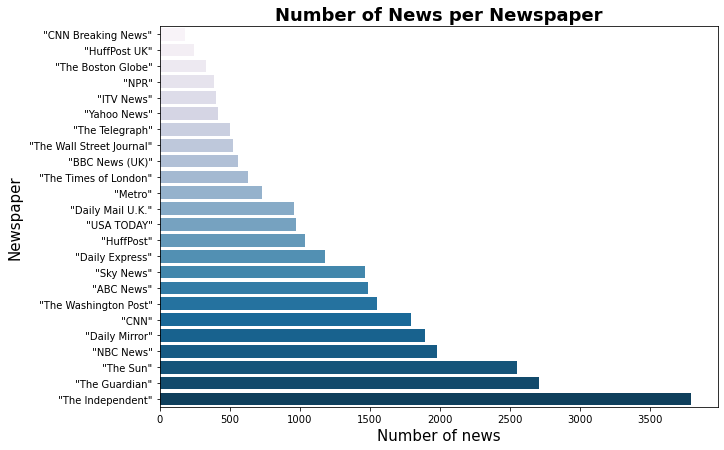

In [218]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(y='newsoutlet_name', data=m1, order=m1['newsoutlet_name'].value_counts().sort_values().index, palette='PuBu')
ax.set_title('Number of News per Newspaper',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Number of news', fontsize = 15)
ax.set_ylabel('Newspaper', fontsize = 15)

In [219]:
b=m1.groupby(['newsoutlet_country'])['newsoutlet_name'].count()
b

newsoutlet_country
UK     17625
USA    10674
Name: newsoutlet_name, dtype: int64

Text(0, 0.5, 'Number of News')

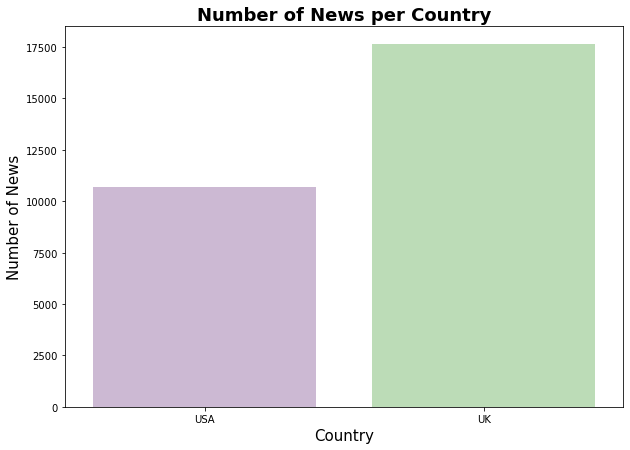

In [220]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='newsoutlet_country', data=m1, palette='PRGn')
ax.set_title('Number of News per Country',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Country', fontsize = 15)
ax.set_ylabel('Number of News', fontsize = 15)

### We still need to extract time of publication, nº of comments and nº of comments bins

#### Time of publication

In [221]:
m1['news_tweet_date']

0        2019-01-02 07:46:28
1        2018-12-27 14:22:19
2        2019-01-01 13:59:00
3        2019-01-01 01:17:16
4        2018-12-30 12:38:46
                ...         
28294    2018-12-28 06:15:48
28295    2018-12-28 18:00:55
28296    2018-12-31 09:59:07
28297    2019-01-09 16:53:20
28298    2019-01-13 15:07:00
Name: news_tweet_date, Length: 28299, dtype: object

In [222]:
m1['news_tweet_date'] = [datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in m1['news_tweet_date']]
m1['hour'] = m1['news_tweet_date'].apply(lambda r:r.hour)
m1

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,hour
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",7
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,14
2,428333,"""CNN Breaking News""",USA,1080101085916868609,2019-01-01 13:59:00,https://cnn.it/2Rl9jgP,Manchester police are treating the New Year's ...,NaN,"(CNN) Police are conducting a ""terrorist inves...",13
3,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,1
4,428333,"""CNN Breaking News""",USA,1079356116885229568,2018-12-30 12:38:46,https://cnn.it/2EWhBpv,"California limits pet store sales of cats, dog...",NaN,(CNN) California pet stores soon will be allow...,12
...,...,...,...,...,...,...,...,...,...,...
28294,16973333,"""The Independent""",UK,1078534962859655173,2018-12-28 06:15:48,https://www.independent.co.uk/news/long_reads/...,"How the Profumo scandal, the ‘headless man’ an...",2018-12-28 00:11:46+00:00,Gleeful civil servants offered John Major the ...,6
28295,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,18
28296,16973333,"""The Independent""",UK,1079678326980165632,2018-12-31 09:59:07,https://www.independent.co.uk/news/uk/politics...,Sajid Javid says 'no easy answers' to migrant ...,2018-12-31 09:45:06+00:00,Sajid Javid has argued there are “no easy answ...,9
28297,16973333,"""The Independent""",UK,1083044058585620485,2019-01-09 16:53:20,https://www.independent.co.uk/life-style/bever...,Coronation Street star Beverley Callard expres...,2019-01-09 15:54:38+00:00,Beverley Callard has expressed her fear that c...,16


In [223]:
m1['hour'].unique()

array([ 7, 14, 13,  1, 12, 21,  5, 16,  4, 11,  2, 15,  3, 17, 18,  0, 22,
       19, 23, 20, 10,  9,  8,  6], dtype=int64)

In [224]:
def time_of_day(x):
    if (x >= 8) and (x < 12):
        return 'Morning'
    elif (x >= 12) and (x < 20):
        return 'Afternoon'
    elif (x >= 20) and (x <= 23):
        return 'Night'
    elif (x >= 0) and (x < 8):
        return 'Night'

In [225]:
m1['time_of_day'] = m1['hour'].apply(time_of_day)
m1

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,hour,time_of_day
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",7,Night
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,14,Afternoon
2,428333,"""CNN Breaking News""",USA,1080101085916868609,2019-01-01 13:59:00,https://cnn.it/2Rl9jgP,Manchester police are treating the New Year's ...,NaN,"(CNN) Police are conducting a ""terrorist inves...",13,Afternoon
3,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,1,Night
4,428333,"""CNN Breaking News""",USA,1079356116885229568,2018-12-30 12:38:46,https://cnn.it/2EWhBpv,"California limits pet store sales of cats, dog...",NaN,(CNN) California pet stores soon will be allow...,12,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
28294,16973333,"""The Independent""",UK,1078534962859655173,2018-12-28 06:15:48,https://www.independent.co.uk/news/long_reads/...,"How the Profumo scandal, the ‘headless man’ an...",2018-12-28 00:11:46+00:00,Gleeful civil servants offered John Major the ...,6,Night
28295,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,18,Afternoon
28296,16973333,"""The Independent""",UK,1079678326980165632,2018-12-31 09:59:07,https://www.independent.co.uk/news/uk/politics...,Sajid Javid says 'no easy answers' to migrant ...,2018-12-31 09:45:06+00:00,Sajid Javid has argued there are “no easy answ...,9,Morning
28297,16973333,"""The Independent""",UK,1083044058585620485,2019-01-09 16:53:20,https://www.independent.co.uk/life-style/bever...,Coronation Street star Beverley Callard expres...,2019-01-09 15:54:38+00:00,Beverley Callard has expressed her fear that c...,16,Afternoon


In [226]:
m1.drop('hour', axis=1, inplace=True)

#### nº of comments

In [227]:
num_com = m.groupby(["news_id"])["comment_tweet_text"].count()

In [228]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(m.groupby(["news_id"])["comment_tweet_text"].count().sort_values())

news_id
1084622016836030464        1
1083053034937241600        1
1084054886323490816        1
1079466969458454531        1
1083052602965872640        1
1083052582371803137        1
1079464639832875008        1
1081154828603150336        1
1081154864481226752        1
1081155206728028161        1
1081153235669393408        1
1081155558948913152        1
1079463130302988290        1
1079463129908539395        1
1081156343678029824        1
1081156599144738816        1
1079460782985883648        1
1079460704577642496        1
1079460110496399360        1
1081156963822723072        1
1079459909224288261        1
1081155783503556608        1
1079467292583514112        1
1084054886214447104        1
1079467761749975042        1
1081147289949954049        1
1083054360207216640        1
1081148027404992513        1
1081148233550913537        1
1083054148394893314        1
1079477845389467648        1
1084051846816321541        1
1081148742420566017        1
1079475325606789121        1
108114

In [229]:
len(m.groupby(["news_id"])["comment_tweet_text"].count().sort_values())

28144

Verifiquei que dá o mesmo para 'in_reply_to_news_id', uma destas colunas pode ser removida.

In [230]:
m1['num_comments_article']= m1['news_id'].map(num_com)

In [231]:
m1

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,time_of_day,num_comments_article
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",Night,87.0
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,Afternoon,44.0
2,428333,"""CNN Breaking News""",USA,1080101085916868609,2019-01-01 13:59:00,https://cnn.it/2Rl9jgP,Manchester police are treating the New Year's ...,NaN,"(CNN) Police are conducting a ""terrorist inves...",Afternoon,24.0
3,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,Night,48.0
4,428333,"""CNN Breaking News""",USA,1079356116885229568,2018-12-30 12:38:46,https://cnn.it/2EWhBpv,"California limits pet store sales of cats, dog...",NaN,(CNN) California pet stores soon will be allow...,Afternoon,119.0
...,...,...,...,...,...,...,...,...,...,...,...
28294,16973333,"""The Independent""",UK,1078534962859655173,2018-12-28 06:15:48,https://www.independent.co.uk/news/long_reads/...,"How the Profumo scandal, the ‘headless man’ an...",2018-12-28 00:11:46+00:00,Gleeful civil servants offered John Major the ...,Night,3.0
28295,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,Afternoon,7.0
28296,16973333,"""The Independent""",UK,1079678326980165632,2018-12-31 09:59:07,https://www.independent.co.uk/news/uk/politics...,Sajid Javid says 'no easy answers' to migrant ...,2018-12-31 09:45:06+00:00,Sajid Javid has argued there are “no easy answ...,Morning,7.0
28297,16973333,"""The Independent""",UK,1083044058585620485,2019-01-09 16:53:20,https://www.independent.co.uk/life-style/bever...,Coronation Street star Beverley Callard expres...,2019-01-09 15:54:38+00:00,Beverley Callard has expressed her fear that c...,Afternoon,3.0


In [232]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28299 entries, 0 to 28298
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   newsoutlet_id         28299 non-null  int64         
 1   newsoutlet_name       28299 non-null  object        
 2   newsoutlet_country    28299 non-null  object        
 3   news_id               28299 non-null  int64         
 4   news_tweet_date       28299 non-null  datetime64[ns]
 5   news_url              28299 non-null  object        
 6   new_title             28227 non-null  object        
 7   news_date             18698 non-null  object        
 8   news_text             28106 non-null  object        
 9   time_of_day           28299 non-null  object        
 10  num_comments_article  28144 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 3.8+ MB


#### nº of comments bins

In [233]:
m1['num_comments_article'].describe()

count    28144.000000
mean        33.750071
std        190.602830
min          1.000000
25%          2.000000
50%          6.000000
75%         21.000000
max      21970.000000
Name: num_comments_article, dtype: float64

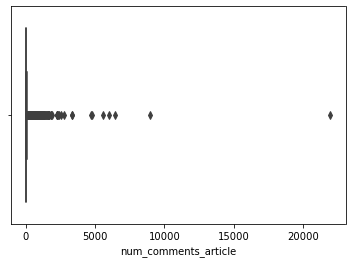

In [234]:
sns.boxplot(m1['num_comments_article'])

In [235]:
# calculate summary statistics
data_mean, data_std = m1['num_comments_article'].mean(), m1['num_comments_article'].std()
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [236]:
lower, upper

(-538.0584194230767, 605.5585615492848)

In [237]:
outliers = [x for x in m1['num_comments_article'] if x < lower or x > upper]
outliers

[628.0,
 639.0,
 641.0,
 1037.0,
 654.0,
 930.0,
 776.0,
 890.0,
 799.0,
 810.0,
 635.0,
 641.0,
 644.0,
 699.0,
 1322.0,
 776.0,
 1697.0,
 665.0,
 673.0,
 2264.0,
 1585.0,
 892.0,
 1118.0,
 738.0,
 657.0,
 625.0,
 765.0,
 783.0,
 999.0,
 657.0,
 1095.0,
 1030.0,
 1486.0,
 877.0,
 820.0,
 731.0,
 810.0,
 788.0,
 788.0,
 2225.0,
 1050.0,
 903.0,
 689.0,
 646.0,
 844.0,
 1327.0,
 637.0,
 864.0,
 825.0,
 878.0,
 1013.0,
 618.0,
 1338.0,
 996.0,
 2280.0,
 775.0,
 649.0,
 735.0,
 1155.0,
 674.0,
 637.0,
 735.0,
 874.0,
 790.0,
 942.0,
 1276.0,
 785.0,
 673.0,
 1000.0,
 1837.0,
 920.0,
 697.0,
 1091.0,
 925.0,
 806.0,
 663.0,
 928.0,
 698.0,
 1670.0,
 693.0,
 1625.0,
 3307.0,
 1410.0,
 1889.0,
 965.0,
 741.0,
 660.0,
 1361.0,
 790.0,
 784.0,
 4674.0,
 899.0,
 991.0,
 718.0,
 2322.0,
 969.0,
 750.0,
 1033.0,
 1573.0,
 945.0,
 1645.0,
 1071.0,
 1009.0,
 622.0,
 1040.0,
 688.0,
 2408.0,
 981.0,
 1675.0,
 1069.0,
 1561.0,
 937.0,
 647.0,
 749.0,
 771.0,
 1455.0,
 1118.0,
 1810.0,
 1151.0,
 991.0

In [238]:
len(outliers)

183

4774 com 1 comentário,
13462 com 5 ou menos comentários,
17467 com 10 ou menos comentários,
20967 com 20 ou menos comentários,
1894 com mais de 100 comentários

##### Retirar noticias com 5 comentário ou menos

In [271]:
finali = m1.loc[m1['num_comments_article'] > 5].copy()
finali

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,time_of_day,num_comments_article
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",Night,87.0
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,Afternoon,44.0
2,428333,"""CNN Breaking News""",USA,1080101085916868609,2019-01-01 13:59:00,https://cnn.it/2Rl9jgP,Manchester police are treating the New Year's ...,NaN,"(CNN) Police are conducting a ""terrorist inves...",Afternoon,24.0
3,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,Night,48.0
4,428333,"""CNN Breaking News""",USA,1079356116885229568,2018-12-30 12:38:46,https://cnn.it/2EWhBpv,"California limits pet store sales of cats, dog...",NaN,(CNN) California pet stores soon will be allow...,Afternoon,119.0
...,...,...,...,...,...,...,...,...,...,...,...
28283,16973333,"""The Independent""",UK,1082624209488998401,2019-01-08 13:05:00,https://www.indy100.com/article/alexandria-aca...,Alexandria Ocasio-Cortez says that there is 'n...,2019-01-07 12:25:24+00:00,2019 is barely even underway but congresswoman...,Afternoon,6.0
28288,16973333,"""The Independent""",UK,1082585338898513921,2019-01-08 10:30:32,https://www.independent.co.uk/news/uk/politics...,Yellow vest protests: Who are the 'far-right e...,2019-01-08 10:20:05+00:00,Police have been accused of ignoring the haras...,Morning,28.0
28295,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,Afternoon,7.0
28296,16973333,"""The Independent""",UK,1079678326980165632,2018-12-31 09:59:07,https://www.independent.co.uk/news/uk/politics...,Sajid Javid says 'no easy answers' to migrant ...,2018-12-31 09:45:06+00:00,Sajid Javid has argued there are “no easy answ...,Morning,7.0


28299 notícias para 14682 notícias

In [272]:
finali['num_comments_article'].describe()

count    14682.000000
mean        62.524384
std        260.594787
min          6.000000
25%         10.000000
50%         20.000000
75%         49.000000
max      21970.000000
Name: num_comments_article, dtype: float64

In [273]:
finali['num_comments_article_log'] = finali['num_comments_article'].apply(np.log)
#finali['num_comments_article'].apply(np.log)

In [274]:
finali

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,time_of_day,num_comments_article,num_comments_article_log
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",Night,87.0,4.465908
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,Afternoon,44.0,3.784190
2,428333,"""CNN Breaking News""",USA,1080101085916868609,2019-01-01 13:59:00,https://cnn.it/2Rl9jgP,Manchester police are treating the New Year's ...,NaN,"(CNN) Police are conducting a ""terrorist inves...",Afternoon,24.0,3.178054
3,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,Night,48.0,3.871201
4,428333,"""CNN Breaking News""",USA,1079356116885229568,2018-12-30 12:38:46,https://cnn.it/2EWhBpv,"California limits pet store sales of cats, dog...",NaN,(CNN) California pet stores soon will be allow...,Afternoon,119.0,4.779123
...,...,...,...,...,...,...,...,...,...,...,...,...
28283,16973333,"""The Independent""",UK,1082624209488998401,2019-01-08 13:05:00,https://www.indy100.com/article/alexandria-aca...,Alexandria Ocasio-Cortez says that there is 'n...,2019-01-07 12:25:24+00:00,2019 is barely even underway but congresswoman...,Afternoon,6.0,1.791759
28288,16973333,"""The Independent""",UK,1082585338898513921,2019-01-08 10:30:32,https://www.independent.co.uk/news/uk/politics...,Yellow vest protests: Who are the 'far-right e...,2019-01-08 10:20:05+00:00,Police have been accused of ignoring the haras...,Morning,28.0,3.332205
28295,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,Afternoon,7.0,1.945910
28296,16973333,"""The Independent""",UK,1079678326980165632,2018-12-31 09:59:07,https://www.independent.co.uk/news/uk/politics...,Sajid Javid says 'no easy answers' to migrant ...,2018-12-31 09:45:06+00:00,Sajid Javid has argued there are “no easy answ...,Morning,7.0,1.945910


In [275]:
pd.qcut(finali['num_comments_article'], q=5)

0        (63.0, 21970.0]
1           (27.0, 63.0]
2           (15.0, 27.0]
3           (27.0, 63.0]
4        (63.0, 21970.0]
              ...       
28283       (5.999, 9.0]
28288       (27.0, 63.0]
28295       (5.999, 9.0]
28296       (5.999, 9.0]
28298       (15.0, 27.0]
Name: num_comments_article, Length: 14682, dtype: category
Categories (5, interval[float64]): [(5.999, 9.0] < (9.0, 15.0] < (15.0, 27.0] < (27.0, 63.0] < (63.0, 21970.0]]

In [276]:
finali['bins_num_comm'] = pd.qcut(finali['num_comments_article'], q=5)

In [277]:
finali['bins_num_comm'] = finali['bins_num_comm'].astype("str")

In [278]:
finali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14682 entries, 0 to 28298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   newsoutlet_id             14682 non-null  int64         
 1   newsoutlet_name           14682 non-null  object        
 2   newsoutlet_country        14682 non-null  object        
 3   news_id                   14682 non-null  int64         
 4   news_tweet_date           14682 non-null  datetime64[ns]
 5   news_url                  14682 non-null  object        
 6   new_title                 14618 non-null  object        
 7   news_date                 6775 non-null   object        
 8   news_text                 14554 non-null  object        
 9   time_of_day               14682 non-null  object        
 10  num_comments_article      14682 non-null  float64       
 11  num_comments_article_log  14682 non-null  float64       
 12  bins_num_comm     

In [281]:
dict={'(5.999, 9.0]':1, '(9.0, 15.0]':2, '(15.0, 27.0]':3, '(27.0, 63.0]':4, '(63.0, 21970.0]':5}

In [282]:
finali.replace({'bins_num_comm': dict}, inplace=True)

In [283]:
finali

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,time_of_day,num_comments_article,num_comments_article_log,bins_num_comm
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",Night,87.0,4.465908,5
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,Afternoon,44.0,3.784190,4
2,428333,"""CNN Breaking News""",USA,1080101085916868609,2019-01-01 13:59:00,https://cnn.it/2Rl9jgP,Manchester police are treating the New Year's ...,NaN,"(CNN) Police are conducting a ""terrorist inves...",Afternoon,24.0,3.178054,3
3,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,Night,48.0,3.871201,4
4,428333,"""CNN Breaking News""",USA,1079356116885229568,2018-12-30 12:38:46,https://cnn.it/2EWhBpv,"California limits pet store sales of cats, dog...",NaN,(CNN) California pet stores soon will be allow...,Afternoon,119.0,4.779123,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28283,16973333,"""The Independent""",UK,1082624209488998401,2019-01-08 13:05:00,https://www.indy100.com/article/alexandria-aca...,Alexandria Ocasio-Cortez says that there is 'n...,2019-01-07 12:25:24+00:00,2019 is barely even underway but congresswoman...,Afternoon,6.0,1.791759,1
28288,16973333,"""The Independent""",UK,1082585338898513921,2019-01-08 10:30:32,https://www.independent.co.uk/news/uk/politics...,Yellow vest protests: Who are the 'far-right e...,2019-01-08 10:20:05+00:00,Police have been accused of ignoring the haras...,Morning,28.0,3.332205,4
28295,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,Afternoon,7.0,1.945910,1
28296,16973333,"""The Independent""",UK,1079678326980165632,2018-12-31 09:59:07,https://www.independent.co.uk/news/uk/politics...,Sajid Javid says 'no easy answers' to migrant ...,2018-12-31 09:45:06+00:00,Sajid Javid has argued there are “no easy answ...,Morning,7.0,1.945910,1


In [284]:
dict_time_day = {'Morning':1, 'Afternoon':2, 'Night':3}
finali.replace({'time_of_day': dict_time_day}, inplace=True)

In [285]:
finali

,newsoutlet_id,newsoutlet_name,newsoutlet_country,news_id,news_tweet_date,news_url,new_title,news_date,news_text,time_of_day,num_comments_article,num_comments_article_log,bins_num_comm
0,428333,"""CNN Breaking News""",USA,1080369723227979776,2019-01-02 07:46:28,https://cnn.it/2AmMvDy,Winning ticket sold for $425 million New Year'...,NaN,"(CNN) Another year, another lottery you didn't...",3,87.0,4.465908,5
1,428333,"""CNN Breaking News""",USA,1078295012532736001,2018-12-27 14:22:19,https://cnn.it/2Q9yazC,Clashes in Tunisia after journalist sets himse...,NaN,(CNN) Clashes in Tunisia have continued betwee...,2,44.0,3.784190,4
2,428333,"""CNN Breaking News""",USA,1080101085916868609,2019-01-01 13:59:00,https://cnn.it/2Rl9jgP,Manchester police are treating the New Year's ...,NaN,"(CNN) Police are conducting a ""terrorist inves...",2,24.0,3.178054,3
3,428333,"""CNN Breaking News""",USA,1079909388524154880,2019-01-01 01:17:16,https://cnn.it/2rXO5Hw,"Chief Justice Roberts avoids controversy, prai...",NaN,(CNN) — Chief Justice John Roberts steered cle...,3,48.0,3.871201,4
4,428333,"""CNN Breaking News""",USA,1079356116885229568,2018-12-30 12:38:46,https://cnn.it/2EWhBpv,"California limits pet store sales of cats, dog...",NaN,(CNN) California pet stores soon will be allow...,2,119.0,4.779123,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28283,16973333,"""The Independent""",UK,1082624209488998401,2019-01-08 13:05:00,https://www.indy100.com/article/alexandria-aca...,Alexandria Ocasio-Cortez says that there is 'n...,2019-01-07 12:25:24+00:00,2019 is barely even underway but congresswoman...,2,6.0,1.791759,1
28288,16973333,"""The Independent""",UK,1082585338898513921,2019-01-08 10:30:32,https://www.independent.co.uk/news/uk/politics...,Yellow vest protests: Who are the 'far-right e...,2019-01-08 10:20:05+00:00,Police have been accused of ignoring the haras...,1,28.0,3.332205,4
28295,16973333,"""The Independent""",UK,1078712411539034112,2018-12-28 18:00:55,https://www.independent.co.uk/news/world/italy...,Italy plans to stop arms sales to Saudi Arabia...,2018-12-28 17:45:24+00:00,Italian Prime Minister Giuseppe Conte has said...,2,7.0,1.945910,1
28296,16973333,"""The Independent""",UK,1079678326980165632,2018-12-31 09:59:07,https://www.independent.co.uk/news/uk/politics...,Sajid Javid says 'no easy answers' to migrant ...,2018-12-31 09:45:06+00:00,Sajid Javid has argued there are “no easy answ...,1,7.0,1.945910,1


In [286]:
test=finali[['newsoutlet_name', 'newsoutlet_country', 'news_id', 'time_of_day', 'num_comments_article_log', 'bins_num_comm']].copy()
test

,newsoutlet_name,newsoutlet_country,news_id,time_of_day,num_comments_article_log,bins_num_comm
0,"""CNN Breaking News""",USA,1080369723227979776,3,4.465908,5
1,"""CNN Breaking News""",USA,1078295012532736001,2,3.784190,4
2,"""CNN Breaking News""",USA,1080101085916868609,2,3.178054,3
3,"""CNN Breaking News""",USA,1079909388524154880,3,3.871201,4
4,"""CNN Breaking News""",USA,1079356116885229568,2,4.779123,5
...,...,...,...,...,...,...
28283,"""The Independent""",UK,1082624209488998401,2,1.791759,1
28288,"""The Independent""",UK,1082585338898513921,1,3.332205,4
28295,"""The Independent""",UK,1078712411539034112,2,1.945910,1
28296,"""The Independent""",UK,1079678326980165632,1,1.945910,1


In [287]:
test = pd.get_dummies(test, columns=["newsoutlet_country"])

In [288]:
test = pd.get_dummies(test, columns=["newsoutlet_name"])

In [289]:
test

,news_id,time_of_day,num_comments_article_log,bins_num_comm,newsoutlet_country_UK,newsoutlet_country_USA,"newsoutlet_name_ ""ABC News""","newsoutlet_name_ ""BBC News (UK)""","newsoutlet_name_ ""CNN Breaking News""","newsoutlet_name_ ""CNN""","newsoutlet_name_ ""Daily Express""","newsoutlet_name_ ""Daily Mail U.K.""","newsoutlet_name_ ""Daily Mirror""","newsoutlet_name_ ""HuffPost UK""","newsoutlet_name_ ""HuffPost""","newsoutlet_name_ ""ITV News""","newsoutlet_name_ ""Metro""","newsoutlet_name_ ""NBC News""","newsoutlet_name_ ""NPR""","newsoutlet_name_ ""Sky News""","newsoutlet_name_ ""The Boston Globe""","newsoutlet_name_ ""The Guardian""","newsoutlet_name_ ""The Independent""","newsoutlet_name_ ""The Sun""","newsoutlet_name_ ""The Telegraph""","newsoutlet_name_ ""The Times of London""","newsoutlet_name_ ""The Wall Street Journal""","newsoutlet_name_ ""The Washington Post""","newsoutlet_name_ ""USA TODAY""","newsoutlet_name_ ""Yahoo News"""
0,1080369723227979776,3,4.465908,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1078295012532736001,2,3.784190,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1080101085916868609,2,3.178054,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1079909388524154880,3,3.871201,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1079356116885229568,2,4.779123,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28283,1082624209488998401,2,1.791759,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
28288,1082585338898513921,1,3.332205,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
28295,1078712411539034112,2,1.945910,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
28296,1079678326980165632,1,1.945910,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [290]:
# export do csv
test.to_csv('metadata.csv', index=False)